Load the CSV file and store as netflix_df.
Filter the data to remove TV shows and store as netflix_subset.
Investigate and subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import the dataset from google drive
netflix_df = pd.read_csv('/content/drive/MyDrive/Netflix Python Case Study/netflix_data.csv')

In [4]:
#display first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [5]:
#get the number of rows and columns
netflix_df.shape

(7787, 11)

In [6]:
#check for the statistical insight of the dataset
netflix_df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.932580,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
duration,7787.0,69.122769,50.950743,1.0,2.0,88.0,106.0,312.0


In [7]:
#check for columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [8]:
#subset netflix_df to select only rows with type movies and save as netflix_subset
netflix_subset = netflix_df[netflix_df['type'] == 'Movie']
print(netflix_subset.head())

  show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year  duration  \
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123   
6       June 1, 2020          2019        95   

       

In [9]:
#subset the netflix_subset, selecting only needed columns and save as netflix_movies
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
print(netflix_movies.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


In [ ]:
#select movies whose duration is less than 60mins and save as short_movies
short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies.head())

                                                 title        country  \
35                                           #Rucker50  United States   
55                 100 Things to do Before High School  United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                  3 Seconds Divorce         Canada   
146                                     A 3 Minute Hug         Mexico   

             genre  release_year  duration  
35   Documentaries          2016        56  
55   Uncategorized          2014        44  
67   Uncategorized          2017        37  
101  Documentaries          2018        53  
146  Documentaries          2019        28  


In [ ]:
#create a for loop and if/elif statement to iterate through the rows of netlix_movies
genre_colors = {'Children' : 'yellow', 'Documentaries' : 'green', 'Stand-Up' : 'blue', 'Other' : 'red'}
colors = []
for lab, row in netflix_movies.iterrows():
  genre = row['genre']
  if genre == 'Children' :
    colors.append(genre_colors['Children'])
  elif genre == 'Documentation' :
    colors.append(genre_colors['Documentaries'])
  elif genre == 'Stand-Up' :
    colors.append(genre_colors['Stand-Up'])
  else:
    colors.append(genre_colors['Other'])
print(colors[0:5])

['red', 'red', 'red', 'red', 'red']


Text(0.5, 1.0, 'Movie Duration by Year of Release')

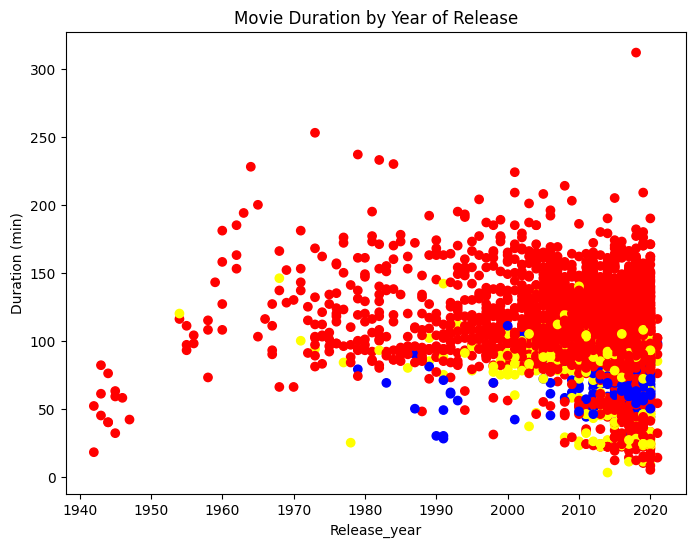

In [ ]:
#visualize movie duration by release_year using scatter plot
fig = plt.figure(figsize=(8,6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.xlabel('Release_year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')



In [ ]:
#After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer.